# Задача 1. Разведочный анализ

* **Дедлайн**: 10.10.2024, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [ ] Считать данные и вывести их основные характеристики, описание признаков.
- [ ] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [ ] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [ ] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [ ] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [ ] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).


### Загрузка сета

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#https://github.com/YBI-Foundation/Dataset/blob/main/Diabetes%20Missing%20Data.csv?plain=1
df = pd.read_csv(r"D:\Pycharn\spbu_ml_cuorse_iinod\homework\task_1\data.csv")


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
Diastolic_BP,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
Skin_Fold,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Serum_Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
Diabetes_Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.head(2)

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0


Тут будем классифицировать болен человек диабетом
- Pregnant: кол-во беременностей
- Glucose: Уровень глюкозы в крови
- Diastolic_BP: диастолическое давление
- SkinFold: Жирочек (толщина кожной складки)
- Serum_Insulin: Концетрация инсулина в сыворотке крови
- BMI: Индекс массы тела
- Diabets Pedigree: функция вероятности проявления диабета на основе анамнеза родителей/близких родственников

## Читка данных и работа с пропусками

In [ ]:
df["Skin_Fold"].fillna(df["Skin_Fold"].median(), inplace=True)
df["Serum_Insulin"].fillna(df["Serum_Insulin"].median(), inplace=True)

df["Glucose"].fillna(df.groupby("Class")["Glucose"].transform("median"), inplace=True)
df["BMI"].fillna(df.groupby("Class")["BMI"].transform("median"), inplace=True)
df["Diastolic_BP"].fillna(df.groupby("Age")["Diastolic_BP"].transform("median"), inplace=True)

### Визуализация

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

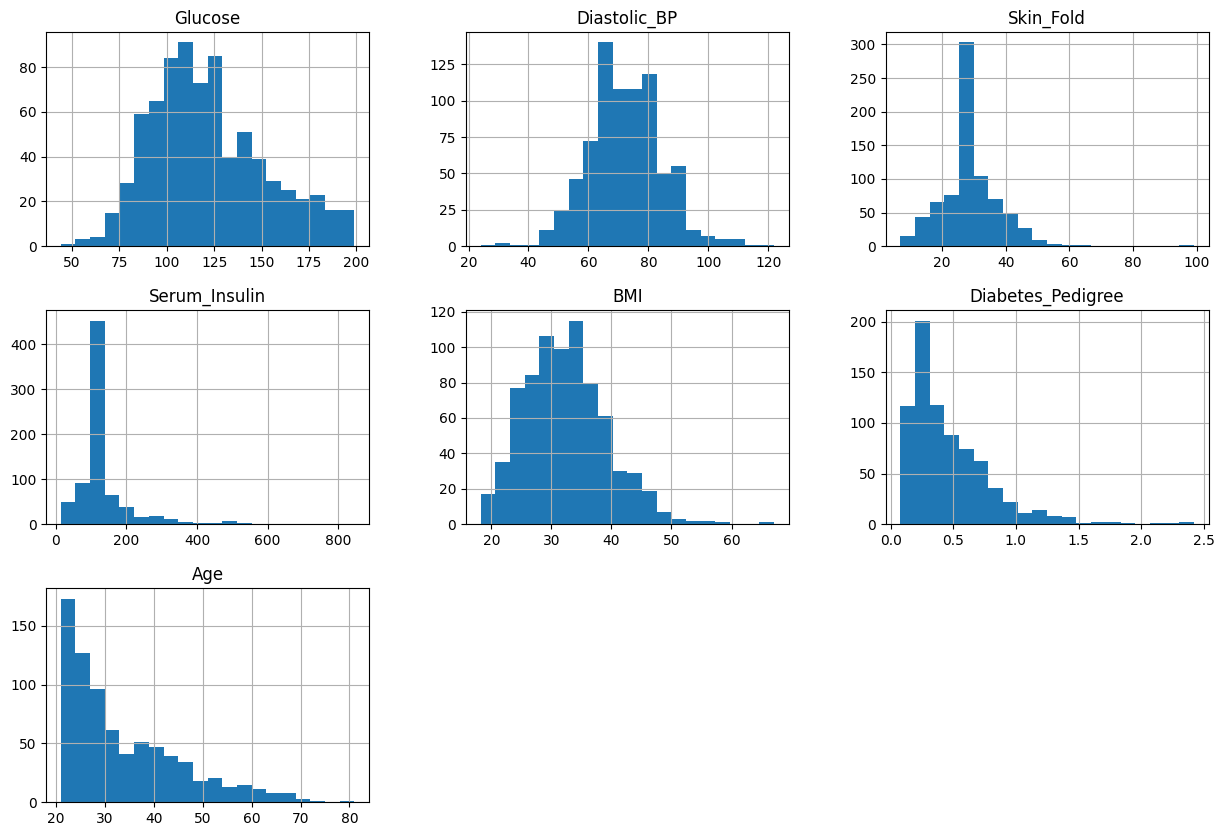

In [7]:

num_features = ["Glucose","Diastolic_BP","Skin_Fold","Serum_Insulin","BMI","Diabetes_Pedigree","Age"]

df[num_features].hist(bins=20, figsize=(15,10))
plt.show()

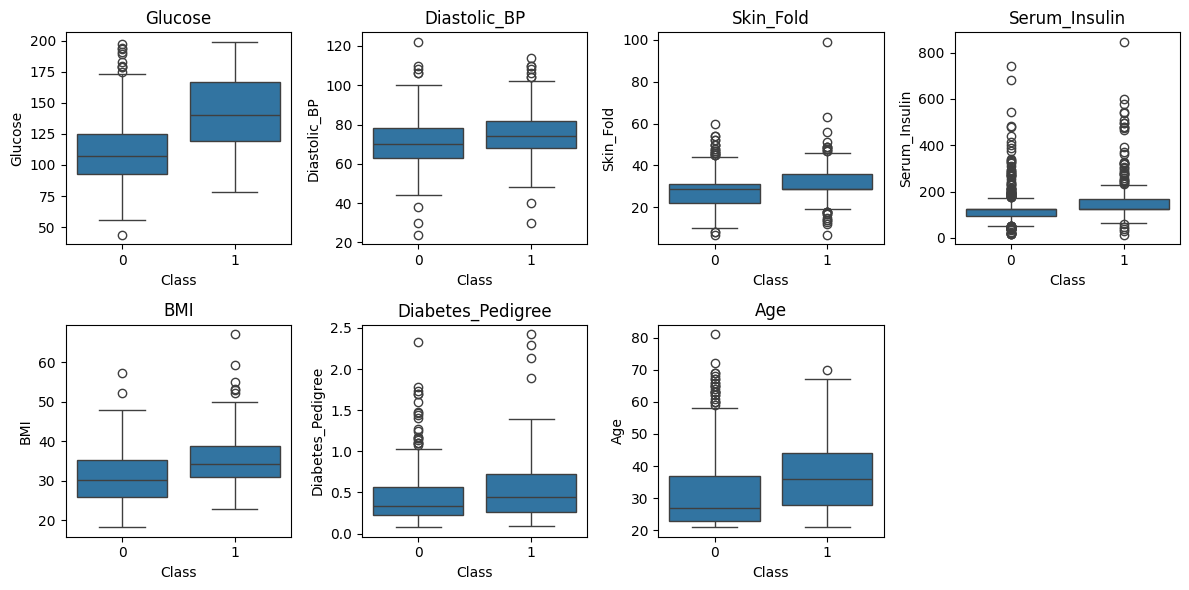

In [8]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_features,1):
    plt.subplot(2,4,i)
    sns.boxplot(x="Class", y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

В инсулине выбросы 

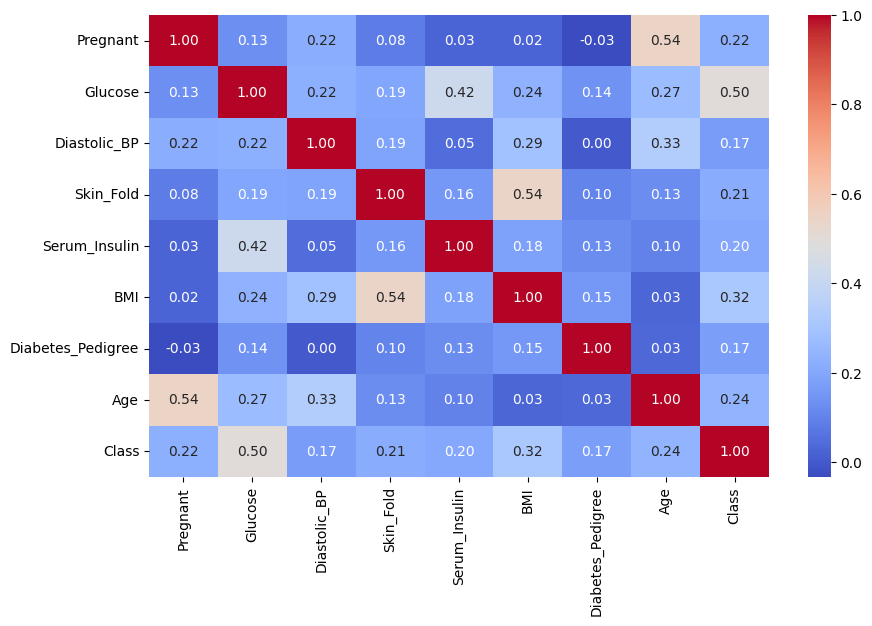

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Корреляция между толщиной складок и ИМТ понятна <br>
Корреляция между глюкозой и инуслинам тоже понятна, мы диабетиков изучаем <br>
Инсулин не сильно коррелирует с диабетом, и там выбросы есть мне кажется это дроп как признак <br>
Толщина складок вроде как отражается в ИМТ, мб тоже дроп. Там еще много пропусков было<br>
Знать бы ещё домен получше, может какие-то взаимосвязи и отношения найти можно <br>


In [ ]:
df = df.drop(columns=["Skin_Fold", "Serum_Insulin"])

По хорошему данные заскейлить ещё

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = ["Glucose","Diastolic_BP","BMI","Diabetes_Pedigree","Age"]

df[scaled_features] = scaler.fit_transform(df[scaled_features])

Я шибко не уверен, но учебы ради <br>
Значения ИМТ перевести в категориальные <br>
Данные на левом сайте нашел по соотвествию

In [11]:
df["BMI_Category"] = pd.cut(
    df["BMI"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["Underweight","Normal","Overweight","Obese"]
)